In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Load the trained model
model = tf.keras.models.load_model('best_deepfake_model.h5')

In [7]:
# Prepare the test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    r'C:\Users\kshit\Downloads\archive (4)\Dataset\Test',  # Path to your test dataset
    target_size=(128, 128),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

Found 10905 images belonging to 2 classes.


In [8]:
# Get true labels and predictions
y_true = test_generator.classes
y_pred = model.predict(test_generator, steps=test_generator.samples).ravel()

10905/10905 [==============================] - 749s 68ms/step


In [9]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

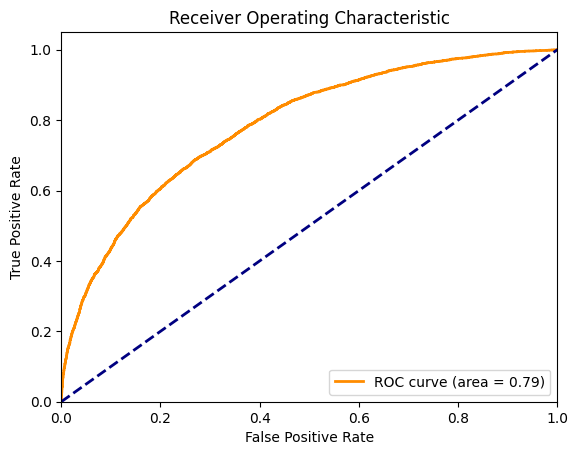

In [10]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()